In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

plt.style.use("ggplot")


In [5]:
train_df = pd.read_csv("/content/customer_churn_dataset-training-master.csv")
test_df = pd.read_csv("/content/customer_churn_dataset-testing-master.csv")

print(train_df.shape, test_df.shape)

(440833, 12) (64374, 12)


In [7]:
df = pd.concat([train_df, test_df], ignore_index=True)
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [8]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [31]:
# Convert Total Spend to numeric
df['Total Spend'] = pd.to_numeric(df['Total Spend'], errors='coerce')

# Fill missing values for Total Spend
df['Total Spend'].fillna(df['Total Spend'].median(), inplace=True)

# Fill missing values for all other columns with their median
for col in df.columns:
    if df[col].isnull().any() and df[col].dtype != 'object' and df[col].dtype != 'category':
        df[col].fillna(df[col].median(), inplace=True)

# Drop customerID if exists
if 'CustomerID' in df.columns:
    df.drop(columns=['CustomerID'], inplace=True)

/tmp/ipython-input-3432494607.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Spend'].fillna(df['Total Spend'].median(), inplace=True)
/tmp/ipython-input-3432494607.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [11]:
df['Churn'].value_counts(normalize=True)


,proportion
Churn,
1.0,0.555203
0.0,0.444797


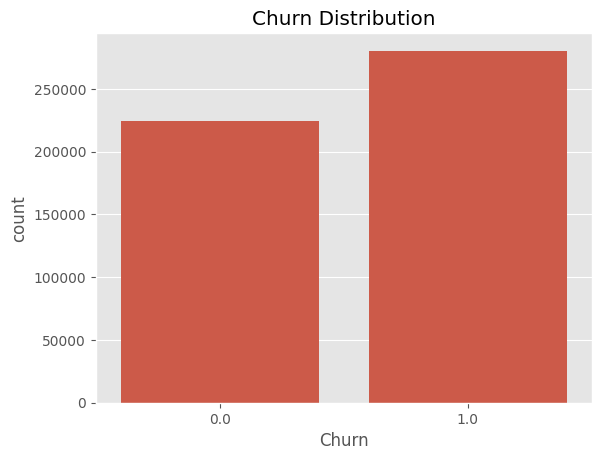

In [12]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


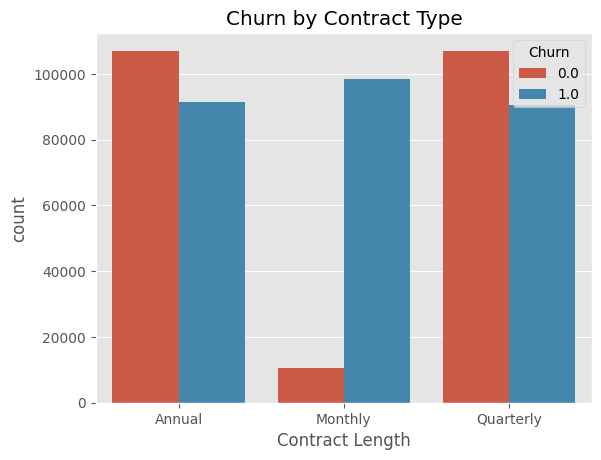

In [14]:
sns.countplot(x='Contract Length', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

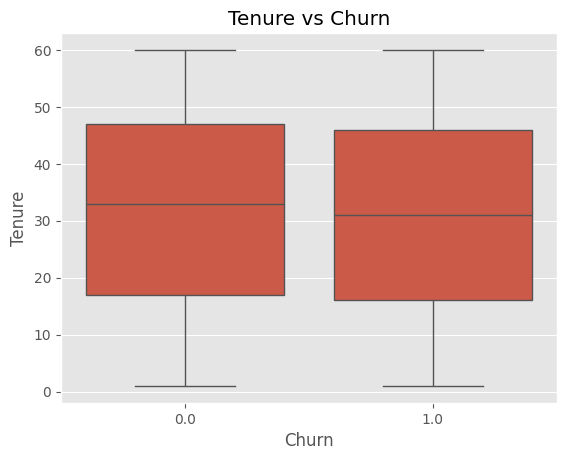

In [16]:
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

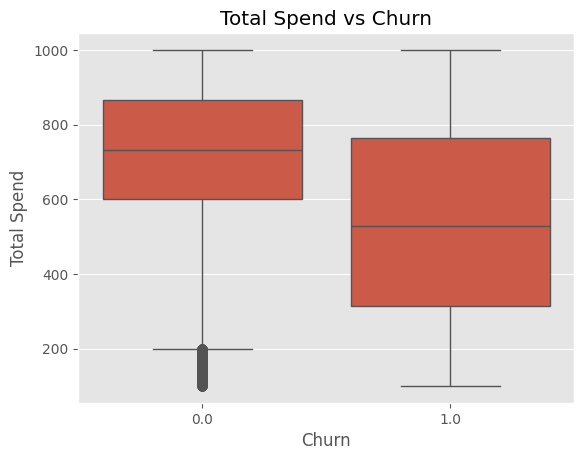

In [19]:
sns.boxplot(x='Churn', y='Total Spend', data=df)
plt.title("Total Spend vs Churn")
plt.show()

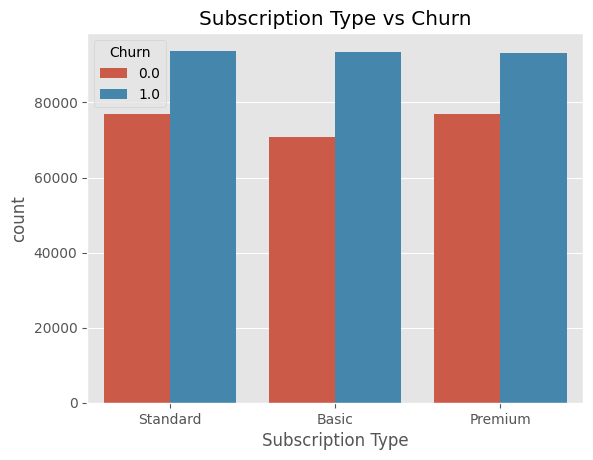

In [21]:
sns.countplot(x='Subscription Type', hue='Churn', data=df)
plt.title("Subscription Type vs Churn")
plt.show()

In [36]:
df['tenure_group'] = pd.cut(
    df['Tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-1 year', '1-2 years', '2-4 years', '4-6 years']
)


In [37]:
le = LabelEncoder()

for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = le.fit_transform(df[col])

In [39]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [41]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [42]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[36522  8441]
 [ 9893 46186]]
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80     44963
         1.0       0.85      0.82      0.83     56079

    accuracy                           0.82    101042
   macro avg       0.82      0.82      0.82    101042
weighted avg       0.82      0.82      0.82    101042

